### Initial Loader Test

In [1]:
from random import shuffle
from Dataset import VideoDataset
from Dataset_image_based import VideoDataset_ImageBased
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from matplotlib import patches
path='/home/nfs/inf6/data/datasets/MOVi/movi_c/'

%load_ext autoreload
%autoreload 2


original_number_of_frames_per_video=24
selected_number_of_frames_per_video=4
max_objects_in_scene=11
video_dataset=VideoDataset(path,split='validation',is_test_dataset=False,original_number_of_frames_per_video=original_number_of_frames_per_video,selected_number_of_frames_per_video=selected_number_of_frames_per_video,max_objects_in_scene=max_objects_in_scene,halve_dataset=True) # to load validation set
print("number of movies: ",len(video_dataset))
video_loader = DataLoader(dataset=video_dataset,
                            batch_size=60,
                            shuffle=True)

iterator=iter(video_loader)
bboxes,masks,rgbs=next(iterator)
bboxes.shape,masks.shape,rgbs.shape
    

number of movies:  125


(torch.Size([60, 4, 11, 4]),
 torch.Size([60, 4, 128, 128]),
 torch.Size([60, 4, 3, 128, 128]))

#### Initial dataloader usage

In [2]:
# RGB input to this function is normalized so it should be multiplied by 255 to display the rgb correctly.
def displayData(video_loader,rgbHasBeenNormalized=False):
    iterator=iter(video_loader)
    bboxes,masks,rgbs=next(iterator)
    rgbs=rgbs if (rgbHasBeenNormalized==False) else rgbs*255
    print(f"shapes: \r\n{bboxes.shape=},\r\n{masks.shape=},\r\n{rgbs.shape=},\r\n============================================")

    fig, ax = plt.subplots(selected_number_of_frames_per_video, 2, figsize=(12, selected_number_of_frames_per_video*3 ))

    for i in range (selected_number_of_frames_per_video):
        if i==0:
            ax[i,0].axis("off")
            ax[i,0].set_title("flow")

        ax[i,0].imshow((rgbs[0,i]).clamp(0, 255).permute(1,2,0).byte().numpy())
        for (x_left,y_left, x_right,y_right) in bboxes[0,i]:
            if x_left<0: continue # it means there is no bbox.
            rect = patches.Rectangle(
                (x_left, y_left),  # (x, y) coordinates of top-left corner
                x_right-x_left,        # Width
                y_right-y_left,       # Height
                linewidth=3,       # Line thickness
                edgecolor='red',   # Border color
                facecolor='none'   # No fill
            )
            ax[i, 0].add_patch(rect)
        """ax[i,1].imshow((flows[0,i]).clamp(0, 255).permute(1,2,0).byte().numpy())
        for (x,y) in coms[0,i]:
            if x<0: continue # it means there is no bbox.
            circle = patches.Circle(
                (x,y),  # (x, y) coordinates of top-left corner
                radius=5,
                linewidth=3,       # Line thickness
                edgecolor='black',   # Border color
                facecolor='none'   # No fill
            )
            ax[i, 1].add_patch(circle)
        """
        ax[i,1].imshow((masks[0,i]).clamp(0, 255).byte().numpy())

    plt.tight_layout()
    plt.show()


shapes: 
bboxes.shape=torch.Size([60, 4, 11, 4]),
masks.shape=torch.Size([60, 4, 128, 128]),
rgbs.shape=torch.Size([60, 4, 3, 128, 128]),


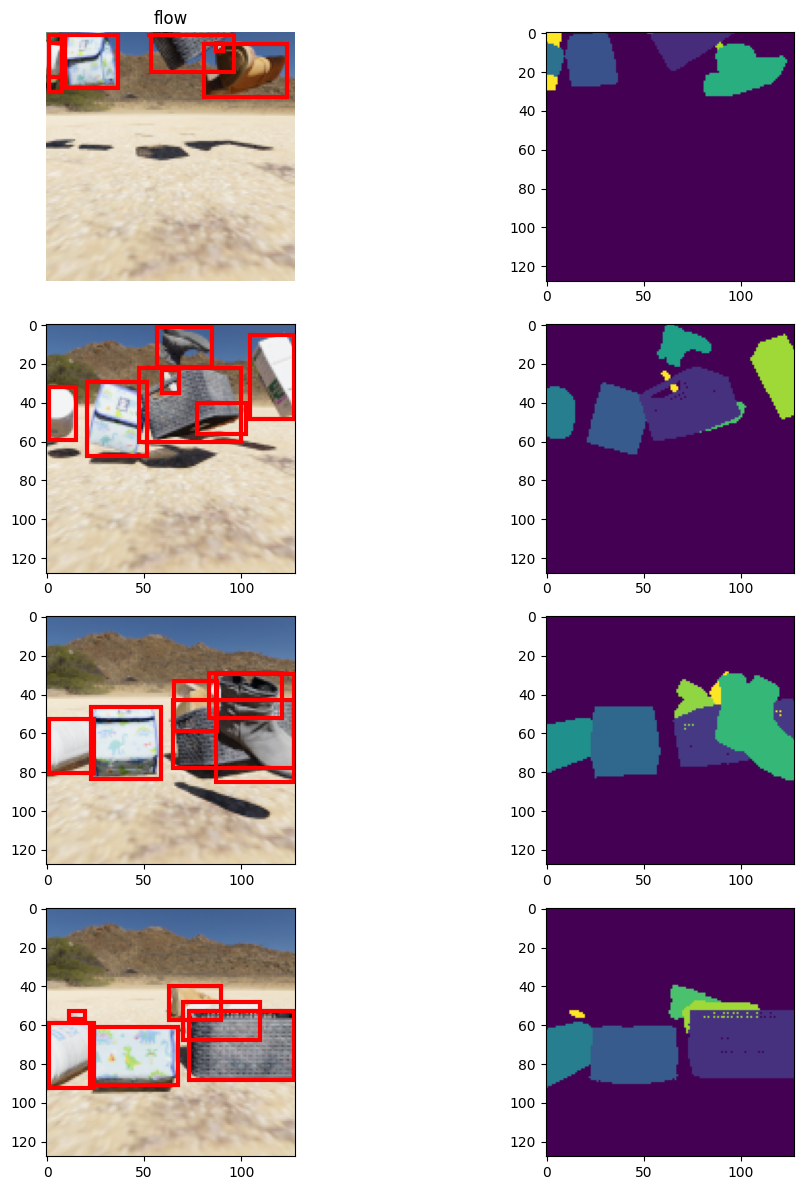

In [3]:
displayData(video_loader)

#### Dataloaders with transforms

shapes: 
bboxes.shape=torch.Size([60, 4, 11, 4]),
masks.shape=torch.Size([60, 4, 64, 64]),
rgbs.shape=torch.Size([60, 4, 3, 64, 64]),


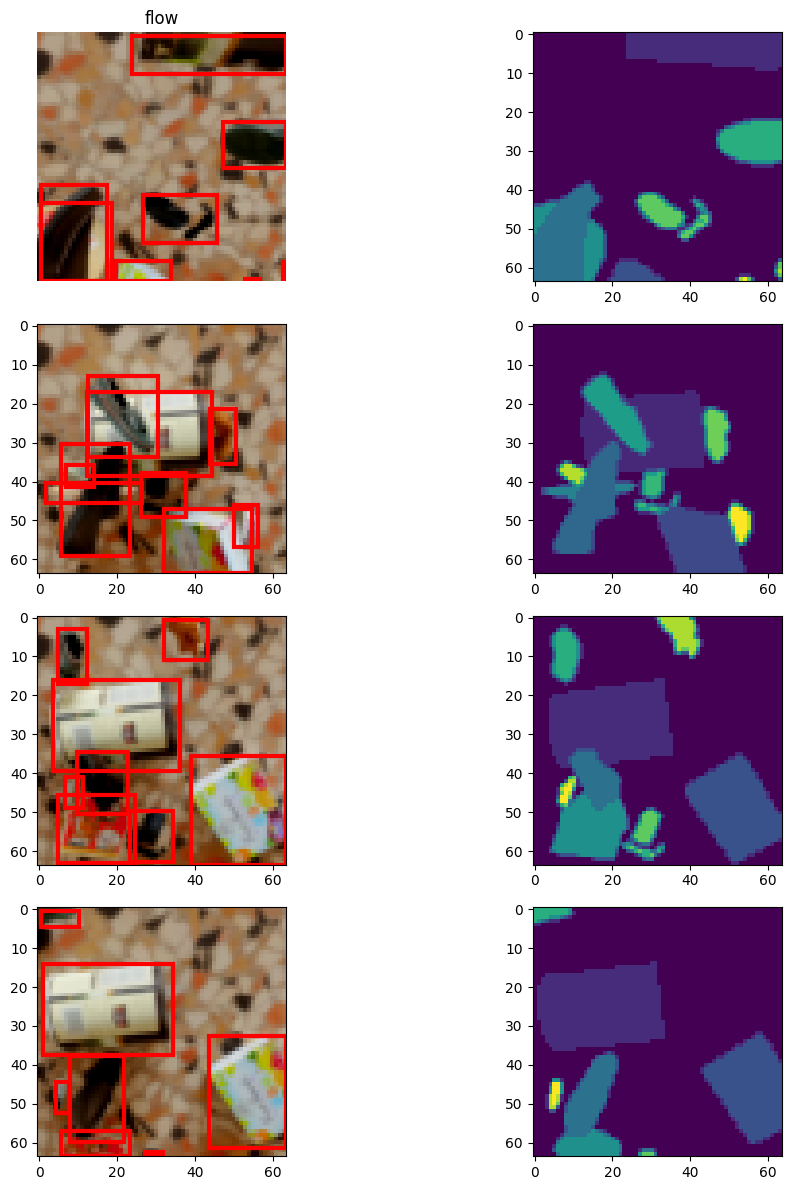

In [4]:
import sys
import os
import shutil
sys.path.append(os.path.abspath(".."))
from loader.transforms import RGBNormalizer,Composition,CustomResize,RandomHorizontalFlip,RandomVerticalFlip,CustomColorJitter
transform_composition = Composition([
                                        RGBNormalizer(),
                                        CustomResize((64,64)),
                                        RandomVerticalFlip(0.6),
                                        RandomHorizontalFlip(0.6),
                                        CustomColorJitter(
                                            brightness=(0.8, 1.2),
                                            hue=(-0.3, 0.3),
                                            contrast=(0.6, 1.8),
                                            saturation=(0.5, 1.5)
                                        )
                                    ])
#transform_composition=None
video_dataset=VideoDataset(path,
                            split='train',
                            is_test_dataset=False,
                            selected_number_of_frames_per_video=selected_number_of_frames_per_video,
                            original_number_of_frames_per_video=original_number_of_frames_per_video,
                            max_objects_in_scene=max_objects_in_scene,
                            halve_dataset=False,
                            transforms=transform_composition)

video_loader = DataLoader(dataset=video_dataset,
                            batch_size=60,
                            shuffle=False)
len(video_loader)
displayData(video_loader,rgbHasBeenNormalized=True)

#### Data loader (image based)

number of movies:  62
torch.Size([60, 10, 3, 128, 128])


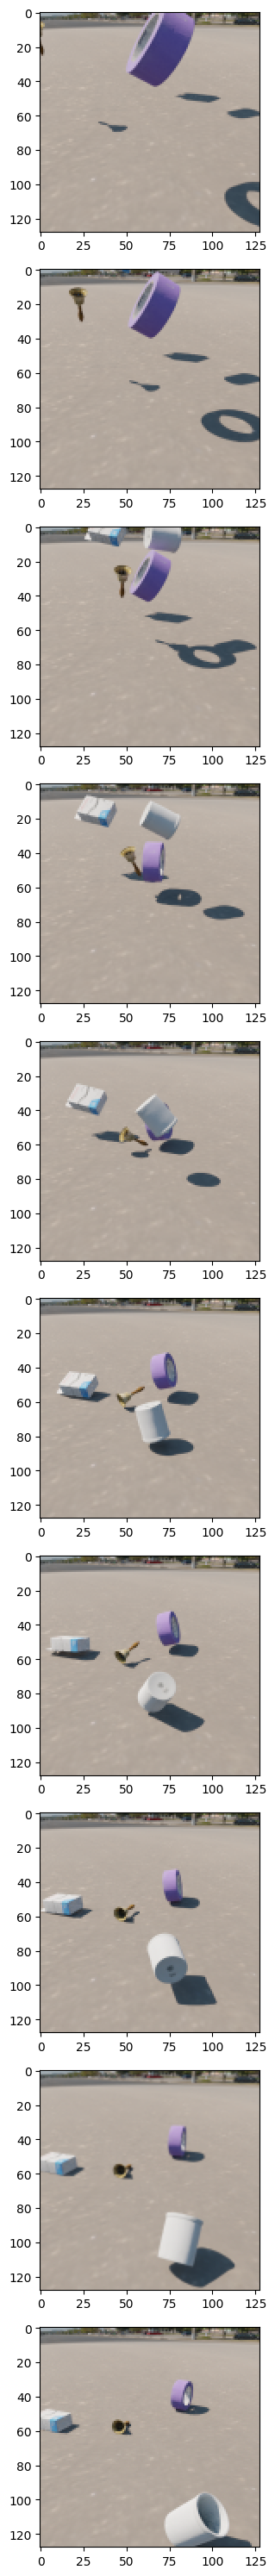

In [25]:
from Dataset_image_based import VideoDataset_ImageBased
from torch.utils.data import DataLoader

path='/home/nfs/inf6/data/datasets/MOVi/movi_c/'

original_number_of_frames_per_video=24
selected_number_of_frames_per_video=10
video_dataset=VideoDataset_ImageBased(path,
                                        split='validation',
                                        is_test_dataset=True,
                                        original_number_of_frames_per_video=original_number_of_frames_per_video,
                                        selected_number_of_frames_per_video=selected_number_of_frames_per_video,
                                        halve_dataset=True) # to load validation set
print("number of movies: ",len(video_dataset))
video_loader = DataLoader(dataset=video_dataset,
                            batch_size=60,
                            shuffle=True)

iterator=iter(video_loader)
rgbs=next(iterator)
print(rgbs.shape)
fig, ax = plt.subplots(selected_number_of_frames_per_video, 1, figsize=(12, selected_number_of_frames_per_video*3 ))

for i in range (selected_number_of_frames_per_video):
    ax[i].imshow((rgbs[0,i]).clamp(0, 255).permute(1,2,0).byte().numpy())
plt.tight_layout()
plt.show()


#### Patchifier

number of movies:  62
Image Shape: torch.Size([3, 128, 128])


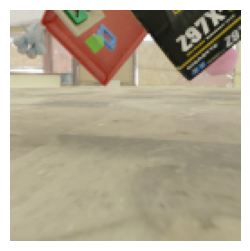

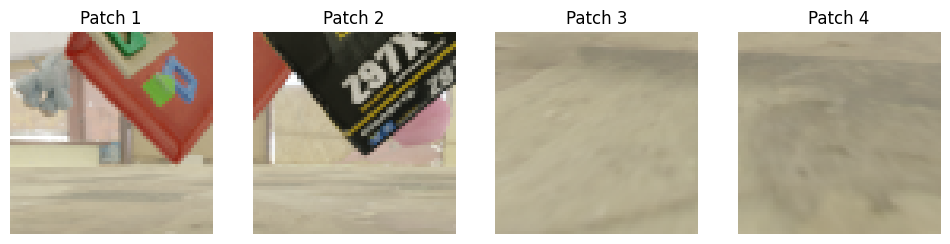

In [22]:
from Dataset_image_based import VideoDataset_ImageBased
from torch.utils.data import DataLoader
from models.transformers.attention_mechanism import Patchifier

path='/home/nfs/inf6/data/datasets/MOVi/movi_c/'

original_number_of_frames_per_video=24
selected_number_of_frames_per_video=10
video_dataset=VideoDataset_ImageBased(path,split='validation',is_test_dataset=True,original_number_of_frames_per_video=original_number_of_frames_per_video,selected_number_of_frames_per_video=selected_number_of_frames_per_video,halve_dataset=True) # to load validation set
print("number of movies: ",len(video_dataset))
video_loader = DataLoader(dataset=video_dataset,
                            batch_size=60,
                            shuffle=True)

iterator=iter(video_loader)
rgbs=next(iterator)
patchifier=Patchifier(patch_size=64)
patch_data = patchifier(rgbs)

BATCH_IDX = 1

plt.figure(figsize=(3, 3))
plt.imshow(rgbs[BATCH_IDX,0].permute(1, 2, 0).byte().numpy())
print(f"Image Shape: {rgbs[BATCH_IDX,0,:,:].shape}")
plt.axis("off")

num_patches = patch_data.shape[2] # num_patches = num_patch_H * num_patch_W
patch_size = patchifier.patch_size # patch_size = 8, this the the H,W of each single patch
fig, ax = plt.subplots(1, num_patches)
fig.set_size_inches(3 * num_patches, 3)
for i in range(num_patches):
    cur_patch = patch_data[BATCH_IDX,0, i].reshape(3, patch_size, patch_size)
    ax[i].imshow(cur_patch.permute(1, 2, 0)/255)
    ax[i].set_title(f"Patch {i+1}")
    ax[i].axis("off")

plt.show()
